<a href="https://colab.research.google.com/github/Kanav-Jain/Deep-Learning-Models/blob/main/cifar10%5Bffnn%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config = configuration)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
num_labels = len(np.unique(y_train))
num_labels

10

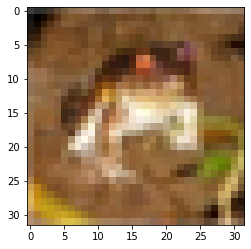

In [8]:
plt.imshow(x_train[0])

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train)

In [12]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
input_size = x_train.shape[1] **2 * (x_train.shape[-1])

In [14]:
input_size

3072

In [15]:
x_train = np.reshape(x_train, [-1,input_size])

In [16]:
x_train[1]

array([154, 177, 187, ..., 143, 133, 144], dtype=uint8)

In [17]:
x_test = np.reshape(x_test, [-1,input_size,])

In [18]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [19]:
x_test.shape

(10000, 3072)

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
cifar10_model = Sequential()

In [22]:
cifar10_model.add(Dense(input_dim = input_size, units = 256, kernel_initializer='uniform', activation = 'relu'))

In [23]:
cifar10_model.add(Dense(units = 256, kernel_initializer='uniform', activation = 'relu'))

In [24]:
cifar10_model.add(Dense(units = num_labels, kernel_initializer='uniform', activation = 'softmax'))

In [25]:
cifar10_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
cifar10_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
results = cifar10_model.fit(x_train, y_train, batch_size = 120, epochs = 20)

Epoch 1/20
417/417 [==============================] - 20s 15ms/step - loss: 1.9737 - accuracy: 0.2731
Epoch 2/20
417/417 [==============================] - 6s 15ms/step - loss: 1.6808 - accuracy: 0.3989
Epoch 3/20
417/417 [==============================] - 6s 14ms/step - loss: 1.6005 - accuracy: 0.4261
Epoch 4/20
417/417 [==============================] - 6s 14ms/step - loss: 1.5324 - accuracy: 0.4524
Epoch 5/20
417/417 [==============================] - 6s 14ms/step - loss: 1.4866 - accuracy: 0.4711
Epoch 6/20
417/417 [==============================] - 6s 14ms/step - loss: 1.4535 - accuracy: 0.4823
Epoch 7/20
417/417 [==============================] - 6s 14ms/step - loss: 1.4263 - accuracy: 0.4916
Epoch 8/20
417/417 [==============================] - 6s 15ms/step - loss: 1.3778 - accuracy: 0.5097
Epoch 9/20
417/417 [==============================] - 6s 14ms/step - loss: 1.3686 - accuracy: 0.5146
Epoch 10/20
417/417 [==============================] - 6s 14ms/step - loss: 1.3426 - accur

In [28]:
y_pred = cifar10_model.predict(x_test)

In [29]:
len(y_pred)

10000

In [30]:
y_pred = np.argmax(y_pred,axis = 1)

In [31]:
y_pred

array([3, 9, 8, ..., 2, 7, 7])

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
confusion_matrix(y_test, y_pred)

array([[583,  40,  38,  25,  59,  15,  24,  64, 109,  43],
       [ 40, 691,   7,  30,   9,  17,  16,  40,  45, 105],
       [ 68,  18, 260,  96, 231,  63, 127,  97,  23,  17],
       [ 21,  26,  49, 344,  78, 177, 167,  82,  30,  26],
       [ 40,  13,  72,  46, 544,  36, 120, 104,  18,   7],
       [ 12,   9,  55, 209,  89, 376, 107, 105,  22,  16],
       [  6,  17,  36,  79, 136,  41, 630,  26,  11,  18],
       [ 34,  20,  18,  50,  99,  55,  27, 666,   3,  28],
       [ 99,  72,   4,  25,  41,  17,  12,  45, 631,  54],
       [ 39, 242,   5,  37,  17,  13,  21,  82,  44, 500]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1000
           1       0.60      0.69      0.64      1000
           2       0.48      0.26      0.34      1000
           3       0.37      0.34      0.35      1000
           4       0.42      0.54      0.47      1000
           5       0.46      0.38      0.42      1000
           6       0.50      0.63      0.56      1000
           7       0.51      0.67      0.58      1000
           8       0.67      0.63      0.65      1000
           9       0.61      0.50      0.55      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.52      0.52      0.52     10000

